# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.


2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.


3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.


4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

__1.1.1__

In [1]:
import pandas as pd
import numpy as np
import math

# Note: We are handling the missing data here
# If we encounter a (-1), we skip the value
def compute_median(s):
    nums = s.split(sep=';')
    return np.median([int(i) for i in nums if i != '-1'])

# Load data
publication = pd.read_csv("data/dataset_final.csv")

# Find median value
publication['authors_publications_median'] = [compute_median(i) for i in publication['authors_publications']]
publication['authors_citations_median'] = [compute_median(i) for i in publication['authors_citations']]
publication['authors_hindex_median'] = [compute_median(i) for i in publication['authors_hindex']]

Please also refer to 1.1.4 for an explanation of how missing data is handled.

__1.1.2__

In [2]:
# Check how many papers have missing publications value for the last author
count_mlap = 0
for i in range(publication.shape[0]):
    if publication.authors_publications[i].split(sep=';')[-1]=='-1':
        count_mlap += 1
print('Number of missing values (-1) in last author publications:', count_mlap)

# Check how many papers have missing citations value for the last author
count_mlac = 0
for i in range(publication.shape[0]):
    if publication.authors_citations[i].split(sep=';')[-1]=='-1':
        count_mlac += 1
print('Number of missing values (-1) in last author citations:', count_mlac)

Number of missing values (-1) in last author publications: 0
Number of missing values (-1) in last author citations: 0


Since there are no missing values in the number of publications and citations of the last author for any paper in the dataset, we can compute the `reputation` of last author for each paper without errors.

In [3]:
def compute_reputation(cite, publicate):
    return math.log(int(cite.split(sep=';')[-1]) / int(publicate.split(sep=';')[-1]) + 1, 10)

# Compute reputation of last author
publication['reputation'] = [compute_reputation(i, j) for i,j in zip(publication['authors_citations'],
                                                                     publication['authors_publications'])]

__1.1.3__

In [4]:
def is_top_company(s):
    companies = s.split(sep=';')
    for company in companies:
        if company in ["Facebook", "Google", "Microsoft", "Deepmind"]:
            return 1
    return 0

def is_top_institution(s):
    institutions = [int(i) for i in s.split(sep=';')]
    for institution in institutions:
        if institution <= 10:
            return 1
    return 0

# Find the top companies and top institutions
publication['has_top_company'] = [is_top_company(i) for i in publication['institution']]
publication['has_top_institution'] = [is_top_institution(i) for i in publication['csranking']]

__1.1.4__

In [5]:
# Checking missing values in author publications
count_map = 0
count_pmap = 0
for i in range(publication.shape[0]):
    nums = publication.authors_publications[i].split(sep=';')
    temp = count_map
    for j in range(len(nums)):
        if nums[j]=='-1':
            count_map += 1
    if count_map-temp == len(nums):
        count_pmap +=1
print('Number of missing values (-1) in \'authors_publications\':', count_map)
print('Number of paper with only missing values (-1) in \'authors_publications\':', count_pmap)

# Checking missing values in author citations
count_mac = 0
count_pmac= 0
for i in range(publication.shape[0]):
    nums = publication.authors_citations[i].split(sep=';')
    temp = count_mac
    for j in range(len(nums)):
        if nums[j]=='-1':
            count_mac += 1
    if count_mac-temp == len(nums):
        count_pmac +=1
print('Number of missing values (-1) in \'authors_citations\':', count_mac)
print('Number of paper with only missing values (-1) in \'authors_citations\':', count_pmac)

# Checking missing values in author h-indices
count_mah = 0
count_pmah = 0
for i in range(publication.shape[0]):
    nums = publication.authors_hindex[i].split(sep=';')
    temp = count_mah
    for j in range(len(nums)):
        if nums[j]=='-1':
            count_mah += 1
    if count_mah-temp == len(nums):
        count_pmah +=1
print('Number of missing values (-1) in \'authors_hindex\':', count_mah)
print('Number of paper with only missing values (-1) in \'authors_hindex\':', count_pmah)

Number of missing values (-1) in 'authors_publications': 104
Number of paper with only missing values (-1) in 'authors_publications': 0
Number of missing values (-1) in 'authors_citations': 104
Number of paper with only missing values (-1) in 'authors_citations': 0
Number of missing values (-1) in 'authors_hindex': 104
Number of paper with only missing values (-1) in 'authors_hindex': 0


We observe that there are several missing values (-1) in the features: 104 in `authors_publications`, 104 in `authors_citations` and 104 in `authors_hindex` (a further analysis shows that if a author has a missing value in `authors_publications` then he has missing values also in `authors_citations` and `authors_hindex`). However, since no paper has missing values in these three features for all its authors, we can compute the median of the elements of each of these three features ignoring the missing values. This is exactly the same of replacing the missing values with the median and then computing the three new features.

In [6]:
# For reference
publication.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_publications_median,authors_citations_median,authors_hindex_median,reputation,has_top_company,has_top_institution
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True,42.0,904.0,10.0,1.906761,0,1
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False,87.0,889.5,15.5,0.966675,0,0
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True,78.0,8800.0,33.0,1.714100,1,1
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,Baidu;Baidu;Baidu,-1;-1;-1,6;8,890;1382;9553,37;63;557,12;20;44,False,63.0,1382.0,20.0,1.258896,0,1
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,;International Business Machines;International...,-1;-1;-1,0,366;678;658,10;40;76,5;11;9,False,40.0,658.0,9.0,0.984882,0,1


### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.


2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


__1.2.1__

In [7]:
# Random split
publication_random_train = publication.sample(frac=0.7,random_state=200)
publication_random_test = publication.drop(publication_random_train.index)

print("Training set size: {}".format(publication_random_train.shape[0]))
print("Testing set size: {}".format(publication_random_test.shape[0]))

Training set size: 2979
Testing set size: 1277


__1.2.2__

In [8]:
# longitudinal split
publication_long_train = publication[publication['year'].isin([2018, 2019])]
publication_long_test = publication[publication['year'].isin([2020])]

print("Training set size: {}".format(publication_long_train.shape[0]))
print("Testing set size: {}".format(publication_long_test.shape[0]))

Training set size: 2204
Testing set size: 2052


### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- median values the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).


2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?

**From now onwards (in this task and the following ones), consider only the random split.**


3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.


4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.


5. Report the($R^2$ for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)


__1.3.1__

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features for scenario 1 - random split
feature_cols = ['authors_publications_median', 'authors_citations_median', 'authors_hindex_median', 'reputation']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings
X_random_test = publication_random_test[feature_cols]
y_random_test = publication_random_test.ratings

# Train the model
lr = LinearRegression() 
lr.fit(X_random_train, y_random_train) 

# Test the model
predict_random = lr.predict(X_random_test)
r2_random = r2_score(y_random_test, predict_random)

# Select features for scenario 2 - longitudinal split
X_long_train = publication_long_train[feature_cols]
y_long_train = publication_long_train.ratings
X_long_test = publication_long_test[feature_cols]
y_long_test = publication_long_test.ratings

# Train the model
lr = LinearRegression() 
lr.fit(X_long_train, y_long_train) 

# Test the model
predict_long = lr.predict(X_long_test)
r2_long = r2_score(y_long_test, predict_long)

print("R_squared for random split: {0:.4f}".format(r2_random))
print("R_squared for longitudinal split: {0:.4f}".format(r2_long))

R_squared for random split: 0.0936
R_squared for longitudinal split: -0.2401


__1.3.2__

The definition the coefficient of determination is: $$R^2 = 1- \frac{SS_{res}}{SS_{tot}}$$ where $SS_{res}$ is the sum of squares of residuals and $SS_{tot}$ is the total sum of squares. It represents the proportion of variance that has been explained by the independent variables in the model. The $R^2$ value, as $SS_{res}$ and $SS_{tot}$, depends on the set where we are evaluating the model. Since we are considering different train and test set for each scenario, the $R^2$ value we get is different for the random and longitudinal splits. 

In both the cases, the $R^2$ valued on the test set, is very small ($\texttt{<<1}$): this means that the indepentent variables alone aren't able to explain properly the variance in the dependent variable (through a linear model).
In particular, for the longitudinal split, $R^2<0$: this means that $SS_{res}>SS_{tot}$ and therefore the prediction of the test set, through this model, is worse than the prediction through an horizontal line (i.e. constant prediction).

Observation: Assuming that our linear model has an intercept, the prediction of the target of the training set through a linear model can't be worse than the prediction through an horizontal line, because a constant prediction is a linear model with fixed intercept and all the coefficents null. For this reason, the $R^2$ evaluated on the target of the training set can't be negative. In fact, in this specific case we have: $$R^2 = 1- \frac{SS_{res}}{SS_{tot}}=\frac{SS_{reg}}{SS_{tot}}>0$$ where $SS_{reg}$ is the regression sum of squares. However we are evaluating $R^2$ on the target of the test set and in this case can be $SS_{res}>SS_{tot}$.


__1.3.3__

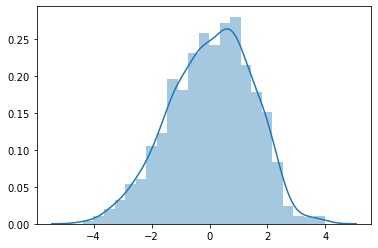

95% confidence interval for P(|res|>2):
lower bound: 0.09
upper bound: 0.21

Sample mean of P(|res|>2): 0.15548800000000002


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

# Calculate residual values
residual = y_random_test-predict_random
residual = residual.to_list()

# Plot the distribution
sns.distplot(residual)
plt.show()

# Bootstrap confidence interval

# Set parameters
resample_size = 100
resample_group = 10000
resample_probability = []

# Resample
for i in range(resample_group):
    sample_residual = np.array(random.sample(residual, resample_size))
    prob = (np.sum(sample_residual > 2) + np.sum(sample_residual < -2))/resample_size
    resample_probability.append(prob)

# Sort the sample result
resample_probability.sort()

# Obtain the interval
print("95% confidence interval for P(|res|>2):")
print("lower bound: {}".format(resample_probability[int(resample_group*0.025)]))
print("upper bound: {}".format(resample_probability[int(resample_group*0.925)]))
print("\nSample mean of P(|res|>2): {}".format(np.mean(resample_probability)))

__1.3.4__

We propose: `has_top_company`, `has_top_institution`, `arxiv`. Even if they are three binary features (not continuous values), their correlation with the `score` is clear. In fact, it is reasonable that people in top companies or top institutions are more likely to produce papers with high quality. Furthermore, `arxiv` column means whether the paper was spotted in a pre-print server around the submission period, and this could influence the scoring of the reviewers.
In summary, we are proposing a new model with the same regressors of the last one with a bonus (or penalty) of 3 additional features: if the paper was published by a top company or a top institution, or if it was pre-printed on arxiv.

**Idea**: For a further analysis, it could be interesting to combine these 3 new features into 2 new features:

- `bias_top_company` = `has_top_company`*`arxiv`
- `bias_top_institution` = `has_top_institution`*`arxiv`


__1.3.5__

In [11]:
# Select features, along with the 3 new proposed ones
feature_cols = ['authors_publications_median', 'authors_citations_median', 'authors_hindex_median', 'reputation',
               'has_top_company', 'has_top_institution', 'arxiv']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings
X_random_test = publication_random_test[feature_cols]
y_random_test = publication_random_test.ratings

# Train the model
lr = LinearRegression() 
lr.fit(X_random_train, y_random_train) 

# Test the model
predict_random = lr.predict(X_random_test)
r2_random = r2_score(y_random_test, predict_random)

print("R_squared for the new model with more features: {0:.4f}".format(r2_random))

R_squared for the new model with more features: 0.1188


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:

    - Median values the number of author citations, publications and h-indexes as calculated in Task 1.1.1.

    - `reputation` of the last author, as calculated in Task 1.1.2.

Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$.

2. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.


3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

__1.4.1__

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Select features for the model
feature_cols = ['authors_publications_median', 'authors_citations_median', 'authors_hindex_median', 'reputation']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings
X_random_test = publication_random_test[feature_cols]
y_random_test = publication_random_test.ratings

# Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor() 
gbr.fit(X_random_train, y_random_train) 

# Test the model
predict_random = gbr.predict(X_random_test)
r2_random = r2_score(y_random_test, predict_random)

print("R_squared for the GBR model: {0:.4f}".format(r2_random))

R_squared for the GBR model: 0.1041


__1.4.2__

In [13]:
# Add the 'crazy' feature
publication_random_train['crazy'] = [9 - i if i>4.96 else -i for i in publication_random_train['ratings']]
publication_random_test['crazy'] = [9 - i if i>4.96 else -i for i in publication_random_test['ratings']]

# Select feature for the model
feature_cols = ['crazy']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings
X_random_test = publication_random_test[feature_cols]
y_random_test = publication_random_test.ratings

# Create the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()
gbr.fit(X_random_train, y_random_train) 

# Test the model
predict_gbr = gbr.predict(X_random_test)
r2_gbr = r2_score(y_random_test, predict_gbr)
print("R_squared for the GBR model: {0:.6f}".format(r2_gbr))

# Create the linear model
lr = LinearRegression()
lr.fit(X_random_train, y_random_train) 

# Test the model
predict_lr = lr.predict(X_random_test)
r2_lr = r2_score(y_random_test, predict_lr)
print("R_squared for the linear model: {0:.4f}".format(r2_lr))

R_squared for the GBR model: 0.999999
R_squared for the linear model: 0.4320


__1.4.3__

According to the definition of gradient boosting regression, the regressor will train the data in multiple stages and the estimator will fit into the residual in each steps. At the end, the residual will become very small.

**Riccardo**: we are not explaining why we are predicting so well.The huge improvement is because we are using the given function of the target as a regressor --- (Yes, but why does this feature improve performance?). However we should add something more about why GBR>>LR


### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.



2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.

    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
    
    
    
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.



4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

__1.5.1__

In [14]:
seed = 10

def build_k_indices(y, N_fold):
    """build k indices for k-fold."""
    N = y.shape[0]
    interval = int(N / N_fold)
    np.random.seed(seed)
    indices = np.random.permutation(N)
    fold_indices = [indices[k * interval: (k + 1) * interval] for k in range(N_fold)]
    
    return np.array(fold_indices)

__1.5.2__

In [15]:
def compare_parameters(n_estimators, learning_rates, k_fold, y, x):
    """
    Given the training set and a set of tuples of parameters (n_estimators, learning_rates) 
    returns the tuple which maximize the accuracy predicted through Cross Validation 
    """
    # Split data in k-fold
    fold_indices = build_k_indices(y, N_fold)
    comparison = []
    
    # Iterating over n_estimators and learning_rate
    for ne in n_estimators:
        for lr in learning_rates:
            r2_gbr_tests = []
            for k in range(N_fold):
                
                # Get k'th subgroup in test set, and others in train set
                msk_test = fold_indices[k]
                msk_train = np.delete(fold_indices, (k), axis=0).ravel()
                
                x_train = x.iloc[msk_train, :]
                x_test = x.iloc[msk_test, :]
                y_train = y.iloc[msk_train]
                y_test = y.iloc[msk_test]
                
                # Train the GBR model
                gbr = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr)
                gbr.fit(x_train, y_train) 

                # Test the model
                predict_gbr = gbr.predict(x_test)
                r2_gbr_test = r2_score(y_test, predict_gbr)
                r2_gbr_tests.append(r2_gbr_test)
                
            r2_gbr_tests.sort()
            comparison.append([ne, lr, np.mean(r2_gbr_tests), r2_gbr_tests[round((N_fold-1)*0.05)], r2_gbr_tests[round((N_fold-1)*0.95)]])
            
    return comparison

**Riccardo**: Do you agree wth me on how a set the IC: i used N_fold-1
        


In [19]:
# Select features for the model
feature_cols = ['authors_publications_median', 'authors_citations_median', 'authors_hindex_median', 'reputation',
               'has_top_company', 'has_top_institution', 'arxiv']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings

# Use the suggested values
N_fold = 20
n_estimators = [50, 75, 100, 150, 200, 250]
learning_rates = [0.1, 0.05, 0.01]

comparison = compare_parameters(n_estimators, learning_rates, N_fold, y_random_train, X_random_train)

# Print the obtained values
for i in range(len(n_estimators)*len(learning_rates)):
    print("n_estimator={}, learning_rate={} -> IC 90% on R_squared: LB={}, UB={}".format(comparison[i][0], comparison[i][1], comparison[i][3], comparison[i][4]))

# Find the best hyperparameters 
ind_best = np.argmax(comparison[:][2])     
best_n_estimators = int(comparison[ind_best][0])
best_learning_rate = comparison[ind_best][1]
r2 = comparison[ind_best][2]

print("\n\nBest n_estimators: ", best_n_estimators)
print("Best learning_rate: ", best_learning_rate)
print("R_squared_predicted with the hyper-paramenters tuned: {0:.4f}".format(r2))

n_estimator=50, learning_rate=0.1 -> IC 90% on R_squared: LB=0.04436386225622835, UB=0.1721677480884396
n_estimator=50, learning_rate=0.05 -> IC 90% on R_squared: LB=0.04123325907516584, UB=0.16227816941005024
n_estimator=50, learning_rate=0.01 -> IC 90% on R_squared: LB=0.01867957415998045, UB=0.08372076581630061
n_estimator=75, learning_rate=0.1 -> IC 90% on R_squared: LB=0.03117600777175289, UB=0.1792488972988211
n_estimator=75, learning_rate=0.05 -> IC 90% on R_squared: LB=0.03876119752614193, UB=0.17596587823987286
n_estimator=75, learning_rate=0.01 -> IC 90% on R_squared: LB=0.022328330884513803, UB=0.11046963917298536
n_estimator=100, learning_rate=0.1 -> IC 90% on R_squared: LB=0.01645540033108306, UB=0.17500620288714197
n_estimator=100, learning_rate=0.05 -> IC 90% on R_squared: LB=0.03921333387623338, UB=0.17885576471365072
n_estimator=100, learning_rate=0.01 -> IC 90% on R_squared: LB=0.025753174994495698, UB=0.12914266264408159
n_estimator=150, learning_rate=0.1 -> IC 90% o

__1.5.3__

In [20]:
# Select features for the model
feature_cols = ['authors_publications_median', 'authors_citations_median', 'authors_hindex_median', 'reputation',
               'has_top_company', 'has_top_institution', 'arxiv']
X_random_train = publication_random_train[feature_cols]
y_random_train = publication_random_train.ratings
X_random_test = publication_random_test[feature_cols]
y_random_test = publication_random_test.ratings

# Train the GBR model
gbr = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate)
gbr.fit(X_random_train, y_random_train) 

# Test the model
predict_random = gbr.predict(X_random_test)
r2_random = r2_score(y_random_test, predict_random)

print("R_squared using the best hyperparameters: {0:.4f}".format(r2_random))

R_squared using the best hyperparameters: 0.1239


__1.5.4__

In real-world problems, we don't know the values of the target on the test set and so we can't compute the $R^2$ value on it.
Even if we know the values of the target on the test set, it is dangerous to set the parameters based on the accuracy that we get on this set, because we don't have any other tool to evaluate if we are overfitting.

We tuned the hyper-parameters on the training set through CV, and we evaluate the performance ($R^2$) of the model on the test set. Comparing the $R^2$  values that we get on the training and the test set, observing that $R^2_{test}<R^2_{train}$, we suspect that we are overfitting a little bit.

Tuning the parameters with testing set would be like 'cheating' and it wouldn't allow us to understand if we are overfitting or not.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.


2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.


3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

__2.1.1__

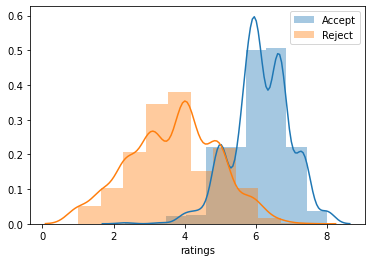

In [21]:
# Find publications that got accepted and rejected in 2020
publication_2020 = publication[publication['year'] == 2020]
publication_2020_ac = publication_2020[publication_2020['decisions'] == 'Accept']
publication_2020_rj = publication_2020[publication_2020['decisions'] == 'Reject']

# Plot the distributions
sns.distplot(publication_2020_ac['ratings'], bins = 10, label = 'Accept')
sns.distplot(publication_2020_rj['ratings'], bins = 10, label = 'Reject')
plt.legend()
plt.show()

__2.1.2__

In [25]:
from scipy import stats

# Testing hypothesis
# H0: mean_accept <= mean_reject
# Ha: mean_accept > mean_reject
t_score, p = stats.ttest_ind(publication_2020_rj['ratings'], publication_2020_ac['ratings'])
print("t-statistic: {0:.4f}".format(t_score))
print("p-value: {:e}".format(p/2))

t-statistic: -45.7978
p-value: 2.607978e-316


Since p-value < 0.05, we reject the null hypothesis.

__2.1.3__

The t-test function provided by `scipy` is a two tailed test to test the hypothesis $\mu_1 -\mu_2=0$. The original $\textit{p-value}$ is the probability of the occurrence of the distribution while $\mu_1 -\mu_2$ is extremely large or small. To adjust the hypothesis to $\mu_1 -\mu_2 \geq 0$ we could divide the p-value by two to obtain the one-tailed p-value. 

The definition of the t-statistic is the ratio of the difference between estimated value and hypothesized value to its standard error ($\sigma$). In our case,

$$t-statistic = \frac{\mu_1 -\mu_2}{\sigma}$$

Therefore, when $t-statistic < 0$, and $p-value < \alpha$, we could reject the null hypothesis that $\mu_1 -\mu_2 \geq 0$.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.

1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 



2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


__2.2.1__

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the binary decisions variable for 2020 publications
publication_2020 = publication[publication['year'] == 2020].copy()
publication_2020['decisions_binary'] = [1 if i == 'Accept' else 0 for i in publication_2020['decisions']]

# Fit the logistic regression model
mod = smf.logit(formula='decisions_binary ~ ratings', data=publication_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        22:09:08   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8811      0.597    -21.574      0.000     -14.051     -11.711
ratings        2.3672      0.

__2.2.2__

Our model is:

$$
\log \Big( \frac{p}{1-p} \Big) = -12.8811 + 2.3672 \cdot 
x_{ratings}
$$

$\beta_{ratings}=2.3672>0$ means that greater is the ratings variable ($x_{ratings}$), greater is $
\log \Big( \frac{p}{1-p} \Big) $ and so the probability that the paper is accepted ($p$). This result confirms our expectations.


In [27]:
# Calculate the probability
newpred = pd.DataFrame({"ratings": [7]})
prediction = res.predict(newpred)
print("The probability that a paper is accepted given that it received a 7 rating score: {0:.4f}".format(prediction.values[0]))

The probability that a paper is accepted given that it received a 7 rating score: 0.9756


### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 

2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

__2.3.1__

In [28]:
# Fit the logistic regression model
mod = smf.logit(formula='decisions_binary ~ ratings + reputation + arxiv', data=publication_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        22:09:42   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.2261      0.634    -20.873      0.000     -14.468     -11.984
arxiv[T.True]     0.

__2.3.2__


Our model is:

$$
\log \Big( \frac{p}{1-p} \Big) = -13.2261 + 0.2890 \cdot 
x_{arxiv} + 2.3541 \cdot x_{ratings} +  0.2267 \cdot x_{reputation}
$$

It can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{-13.2261 + 0.2890 \cdot 
x_{arxiv} + 2.3541 \cdot x_{ratings} +  0.2267 \cdot reputation} =  e^{-13.2261} e^{0.2890 \cdot 
x_{arxiv}} e^{2.3541 \cdot x_{ratings}} e^{0.2267 \cdot x_{reputation}}
$$

$x_{rating}$ is a binary feature, so there are only two cases:

- if $x_{rating}=0$, it doesn't contribute in the model; 
- if $x_{rating}=1$, the log-odds increases of a factor $e^{0.2890}=1.3350>0$. 

This means that greater the `arxiv` variable ($x_{arxiv}$), greater is $
\log \Big( \frac{p}{1-p} \Big) $ and so is the probability that the paper is accepted ($p$).

Fixed the value of $x_{ratings}$ and $x_{reputation}$, we can compute:

$$ 
Odds Ratio = \frac{Odds(x_{arxiv}=1, x_{ratings}=a, x_{reputations}=b)}{Odds(x_{arxiv}=0, x_{ratings}=a, x_{reputations}=b)} = \frac{e^{0.2890 \cdot 1}}{e^{0.2890 \cdot  0}} \cdot 1= e^{0.2890} = 1.3350 
$$

It means that if we know the Odds value for a fixed value of $x_{ratings}$ and $x_{reputation}$, and $x_{arxiv}=0$ we can easily compute the Odds value of the same fixed features but with $x_{arxiv}=1$ multiplying the previos Odds with the Odds Ratio $=1.3350$. 

However, since the $p-value$ of the z-test on regressor `arxiv` is equal to 0.084 (>0.05), there is not big statistical evedence that we can improve the model using the variable `arxiv` as a regressor. As expected, in general, we don't know that if the reviewers know the authors is a benefit or not for the authours themselves. Our hypothesis is that it could influence the judgement of the reviwers, but it depends on the reputations of the authors, and for this reason the fact that $x_{arxiv}$ is not a statistically significant regressor in general, it is as expected.


### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.


2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

__2.4.1__

In [29]:
# Fit the logistic regression model
mod = smf.logit(formula='decisions_binary ~ ratings + reputation + arxiv + has_top_institution \
                + arxiv:has_top_institution', data=publication_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.249931
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5945
Time:                        22:09:48   Log-Likelihood:                -512.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -13.0941      0.640    -20

__2.4.2__

The P-value of the z-test on the regressor `arxiv:has_top_institution` in the model `decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution` is equal to 0.179 (>0.05). This means that in this model, there is not  enough statistical evidence to consider `arxiv:has_top_institution` as a regressor. It might make us thinking that in general, if the reviewers could know who the authors of a paper are and they are associated to a top institution, this don't influence the evaluation.

However the value of this z-test is strictly related with the model, and in this model, we are considering 3 regressors which are very similar: `arxiv`, `has_top_institution` and `arxiv:has_top_institution`.
We observe that, if we consider the same model, without the regressor `arxiv`, the  P-value of the z-test on the regressor `arxiv:has_top_institution` become 0.029 (<0.05) and it means that there is statistical evidence to consider the regressor `arxiv`. In other words, if the reviewers could know who the authors of a paper are and if they are associated with a top institution, this improves (since $\beta_{arxiv}=0.4396>0$) the evaluation.

In general, we are not sure that if the double-blind reviewing process is violated. It can affect the evaluations of the reviewers; but with the following model below we have shown that there is a non-negligible statistical evidence that if the reviewers could know who the authors of a paper are and if they are associated with a top institution, this improves the evaluation.

In [30]:
# Fit the logistic regression model
mod = smf.logit(formula='decisions_binary ~ ratings + reputation + has_top_institution \
                + arxiv:has_top_institution', data=publication_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.249938
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2047
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5945
Time:                        22:10:37   Log-Likelihood:                -512.87
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -13.1047      0.637    -20

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!


2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous regressor that you trained in Step 1?

**Hint:** For a classifier we don't need a training set and a test set!


__3.1.1__

In [31]:
# Load the dataset for propensity scores
propensity_scores = pd.read_csv('./data/propensity_scores.csv.gz', compression = 'gzip')

# Keep only the 2020 publications
publication_2020 = publication[ publication['year'] == 2020 ]
publication_2020 = publication_2020.merge(propensity_scores, on = 'paper')

# For reference
publication_2020.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_publications_median,authors_citations_median,authors_hindex_median,reputation,has_top_company,has_top_institution,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,6.666667,Accept,Samsung;Skolkovo Institute of Science and Tech...,-1;-1;-1;481,0,488;12;481;2097,14;2;17;124,8;1;7;16,False,15.5,484.5,7.5,1.253127,0,1,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,6.750000,Accept,"Department of Computer Science, University of ...",18;18;18;18,1;10,15;23;3;52924,9;13;3;56,2;3;1;22,False,11.0,19.0,2.5,2.975924,0,0,0.567842
2,2020,Stochastic AUC Maximization with Deep Neural N...,Mingrui Liu;Zhuoning Yuan;Yiming Ying;Tianbao ...,6.000000,Accept,University of Iowa;University of Iowa;State Un...,154;154;266;154,9,238;112;2144;3236,29;12;64;187,9;4;24;29,True,46.5,1191.0,16.5,1.262565,0,0,0.334322
3,2020,On the interaction between supervision and sel...,Ryan Lowe*;Abhinav Gupta*;Jakob Foerster;Douwe...,6.666667,Accept,McGill University;University of Montreal;Faceb...,86;128;-1;-1;86,3,3343;36;2107;3454;11328,53;10;58;80;267,17;3;19;29;46,False,58.0,3343.0,19.0,1.637759,1,1,0.402644
4,2020,Towards Better Understanding of Adaptive Gradi...,Mingrui Liu;Youssef Mroueh;Jerret Ross;Wei Zha...,6.000000,Accept,University of Iowa;International Business Mach...,154;-1;-1;-1;-1;-1;154,5;9,238;916;392;108;241;848;3236,29;53;12;46;30;86;187,9;11;4;6;6;17;29,False,46.0,392.0,9.0,1.262565,0,1,0.334322


__3.1.2__

The propensity score is not used to predict the unseen data, instead, it is used to balance the treatment group. The propensity score estimation can still do well with slight overfitting. Therefore, we do not need a testing set for the propensity score classifier. However, the regressor we trained in Task 1 is to predict the outcome, and overfitting might increase the loss of unseen data. Therefore, testing set is required in Task 1.

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.


2. Report how many pairs did you manage to match? How many didn't you?

__3.2__

In [32]:
# Create new copies for treated and non-treated subjects
publication_treated = publication_2020[publication_2020['arxiv'] == True].copy()
publication_non_treated = publication_2020[publication_2020['arxiv'] == False].copy()
publication_treated['treat_status'] = 'treated'
publication_non_treated['treat_status'] = 'untreated'

publication_treated.reset_index(drop = True, inplace = True)
publication_non_treated.reset_index(drop = True, inplace = True)

# Find count
num_treated = publication_treated.shape[0]
num_untreated = publication_non_treated.shape[0]

matched_treated = []
matched_untreated = []
paired = []
epsilon = 0.05

# Find matching propensity scores
for i in range(publication_treated.shape[0]):
    for j in range(publication_non_treated.shape[0]):
        diff =  np.abs(publication_treated.loc[i,'propensity_score'] 
                       - publication_non_treated.loc[j,'propensity_score'])
        if diff < epsilon and j not in matched_untreated:
            matched_treated.append(i)
            matched_untreated.append(j)
            paired.append((i,j,diff))
            break

# Find count
num_matched = len(paired)
print('Number of matchings: {}'.format(num_matched))
print('Number of treated unit unmatched: {}'.format(num_treated-num_matched))
print('Number of non-treated unit unmatched: {}'.format(num_untreated-num_matched))
print('Number of unit unmatched (total): {}'.format(num_treated+num_untreated-2*num_matched))

Number of matchings: 590
Number of treated unit unmatched: 0
Number of non-treated unit unmatched: 872
Number of unit unmatched (total): 872


### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.


2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).


3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

__3.3.1__

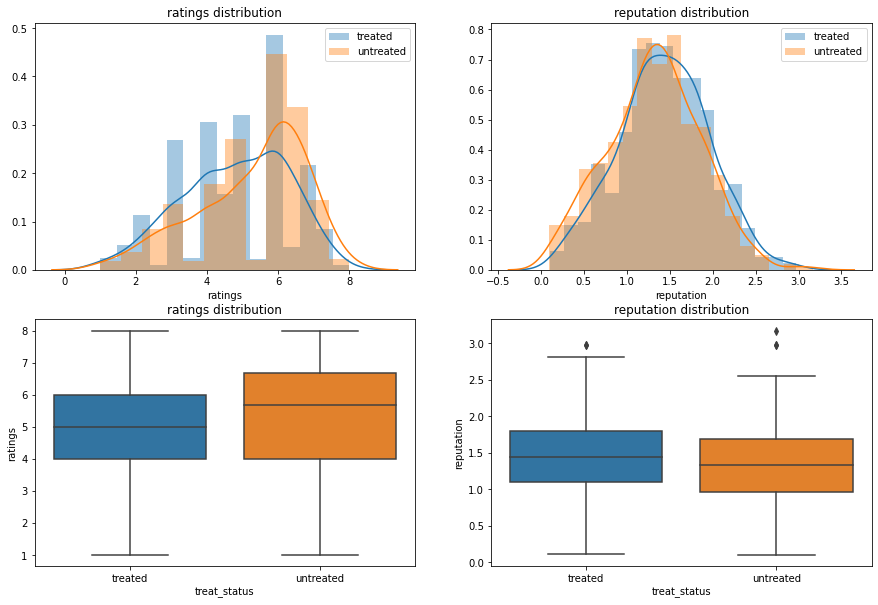

In [33]:
# Create new copies for the matched publications
publication_matched_treated = publication_treated.loc[matched_treated,:]
publication_matched_untreated = publication_non_treated.loc[matched_untreated,:]

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the ratings distribution
sns.distplot(publication_matched_treated['ratings'], ax = axes[0,0], label = 'treated')
sns.distplot(publication_matched_untreated['ratings'], ax = axes[0,0], label = 'untreated')
axes[0,0].set_title('ratings distribution')
axes[0,0].legend()

# Plot the reputation distribution
sns.distplot(publication_matched_treated['reputation'], ax = axes[0,1], label = 'treated')
sns.distplot(publication_matched_untreated['reputation'], ax = axes[0,1], label = 'untreated')
axes[0,1].set_title('reputation distribution')
axes[0,1].legend()

# Set up for box plots
box_df = pd.concat( [publication_matched_treated[['ratings', 'reputation', 'treat_status']].copy(),
                    publication_matched_untreated[['ratings', 'reputation', 'treat_status']].copy()] )

# Box plot the ratings distribution
sns.boxplot(y = 'ratings', x = 'treat_status', data = box_df, ax = axes[1,0])
axes[1,0].set_title('ratings distribution')

# Box plot the reputation distribution
sns.boxplot(y = 'reputation', x = 'treat_status', data = box_df, ax = axes[1,1])
axes[1,1].set_title('reputation distribution')

plt.show()

__3.3.2__

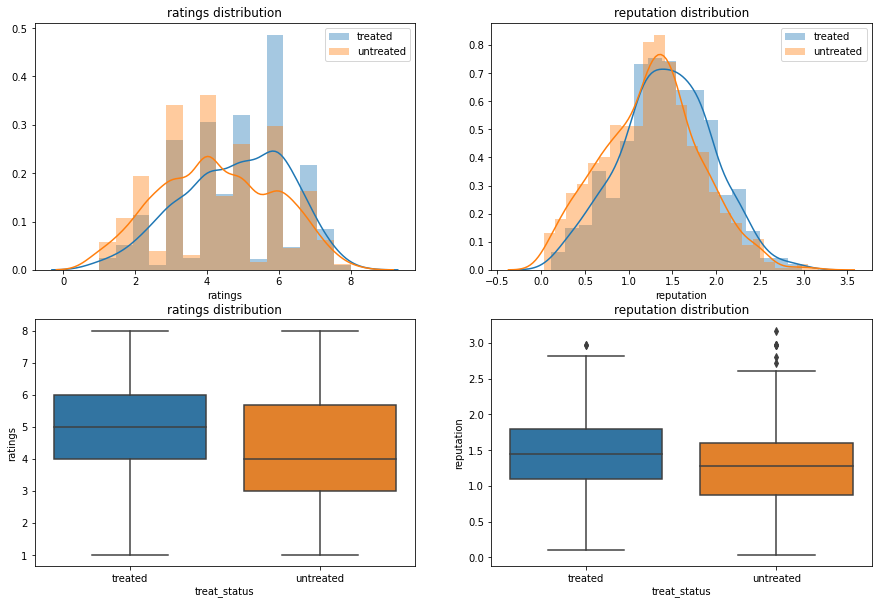

In [34]:
# Set up plot for arxiv vs non-arxiv distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the ratings distribution
sns.distplot(publication_treated['ratings'], ax = axes[0,0], label = 'treated')
sns.distplot(publication_non_treated['ratings'], ax = axes[0,0], label = 'untreated')
axes[0,0].set_title('ratings distribution')
axes[0,0].legend()

# Plot the reputation distribution
sns.distplot(publication_treated['reputation'], ax = axes[0,1], label = 'treated')
sns.distplot(publication_non_treated['reputation'], ax = axes[0,1], label = 'untreated')
axes[0,1].set_title('reputation distribution')
axes[0,1].legend()

# Set up for box plots
box_df = pd.concat( [publication_treated[['ratings', 'reputation', 'treat_status']].copy(),
                    publication_non_treated[['ratings', 'reputation', 'treat_status']].copy()] )

# Box plot the ratings distribution
sns.boxplot(y = 'ratings', x = 'treat_status', data = box_df, ax = axes[1,0])
axes[1,0].set_title('ratings distribution')

# Box plot the reputation distribution
sns.boxplot(y = 'reputation', x = 'treat_status', data = box_df, ax = axes[1,1])
axes[1,1].set_title('reputation distribution')

plt.show()

__3.3.3__

According to the figure, matched pair has similarity on both ratings and reputation columns. However, the distribution without matching is slightly different between treated and untreated group, especially on ratings columns. Thus, we can conclude the matching exactly balance the data to some extent.

**Riccardo**: I am not sure. I would say that the reputation plot remain the same, instead the ratings plot completely change the trend. -- yes, agreed

**Ray**: you are right. the reputation did not change too much according to the box plot.

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


__3.4__

In [35]:
import random

resample_size = 100
resample_group = 10000
resample_ate = []
treatment_effect = []

# Create a binary decision variable
for i in paired:
    te = 0
    if publication_treated.loc[i[0], 'decisions'] == 'Accept':
        te = 1
    if publication_non_treated.loc[i[1], 'decisions'] == 'Accept':
        te -= 1
    treatment_effect.append(te)

# Sample randomly
for i in range(resample_group):
    sampled = random.sample(treatment_effect, resample_size)
    resample_ate.append(np.mean(sampled))

resample_ate.sort()

print('IC 95%: LB={} UB={}'.format(resample_ate[int(resample_group*0.025)], resample_ate[int(resample_group*0.975)]))

IC 95%: LB=-0.33 UB=-0.17


### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.


2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

__3.5.1__

In [36]:
# Create new copies for treated and untreated publications in top institutions 
publication_treated = publication_2020[publication_2020['has_top_institution'] == True].copy()
publication_non_treated = publication_2020[publication_2020['has_top_institution'] == False].copy()
publication_treated['treat_status'] = 'treated'
publication_non_treated['treat_status'] = 'untreated'

publication_treated.reset_index(drop = True, inplace = True)
publication_non_treated.reset_index(drop = True, inplace = True)

# Find count
num_treated = publication_treated.shape[0]
num_untreated = publication_non_treated.shape[0]

matched_treated = []
matched_untreated = []
paired = []
epsilon = 0.05

# Find matching propensity scores
for i in range(publication_treated.shape[0]):
    for j in range(publication_non_treated.shape[0]):
        diff =  np.abs(publication_treated.loc[i,'propensity_score'] 
                       - publication_non_treated.loc[j,'propensity_score'])
        if diff < epsilon and j not in matched_untreated:
            matched_treated.append(i)
            matched_untreated.append(j)
            paired.append((i,j,diff))
            break

num_matched = len(paired)
print('Number of matchings: {}'.format(num_matched))
print('Number of treated unit unmatched: {}'.format(num_treated-num_matched))
print('Number of non-treated unit unmatched: {}'.format(num_untreated-num_matched))
print('Number of unit unmatched (total): {}'.format(num_treated+num_untreated-2*num_matched))

Number of matchings: 657
Number of treated unit unmatched: 738
Number of non-treated unit unmatched: 0
Number of unit unmatched (total): 738


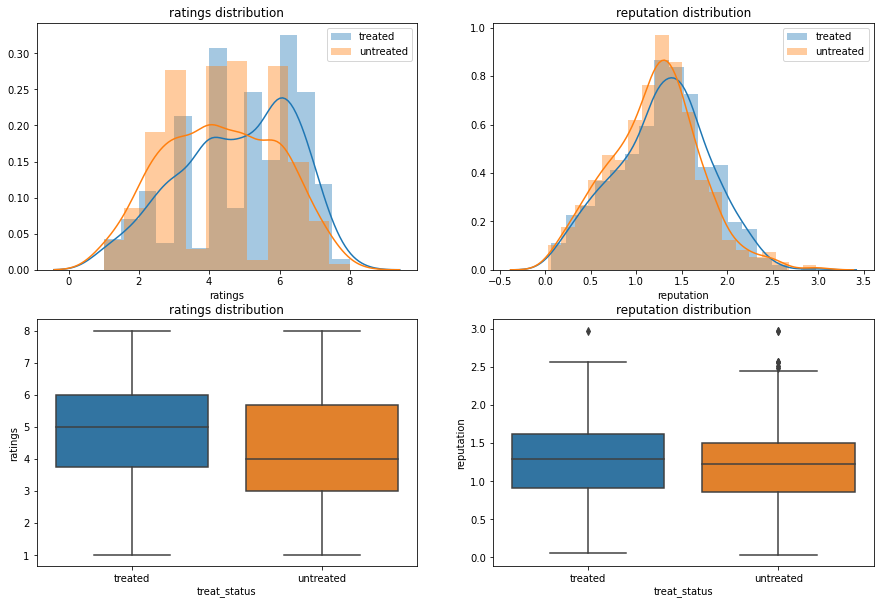

In [37]:
publication_matched_treated = publication_treated.loc[matched_treated,:]
publication_matched_untreated = publication_non_treated.loc[matched_untreated,:]

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the ratings distribution
sns.distplot(publication_matched_treated['ratings'], ax = axes[0,0], label = 'treated')
sns.distplot(publication_matched_untreated['ratings'], ax = axes[0,0], label = 'untreated')
axes[0,0].set_title('ratings distribution')
axes[0,0].legend()

# Plot the reputation distribution
sns.distplot(publication_matched_treated['reputation'], ax = axes[0,1], label = 'treated')
sns.distplot(publication_matched_untreated['reputation'], ax = axes[0,1], label = 'untreated')
axes[0,1].set_title('reputation distribution')
axes[0,1].legend()

# Set up for box plots
box_df = pd.concat( [publication_matched_treated[['ratings', 'reputation', 'treat_status']].copy(),
                    publication_matched_untreated[['ratings', 'reputation', 'treat_status']].copy()] )

# Box plot the ratings distribution
sns.boxplot(y = 'ratings', x = 'treat_status', data = box_df, ax = axes[1,0])
axes[1,0].set_title('ratings distribution')

# Box plot the reputation distribution
sns.boxplot(y = 'reputation', x = 'treat_status', data = box_df, ax = axes[1,1])
axes[1,1].set_title('reputation distribution')

plt.show()

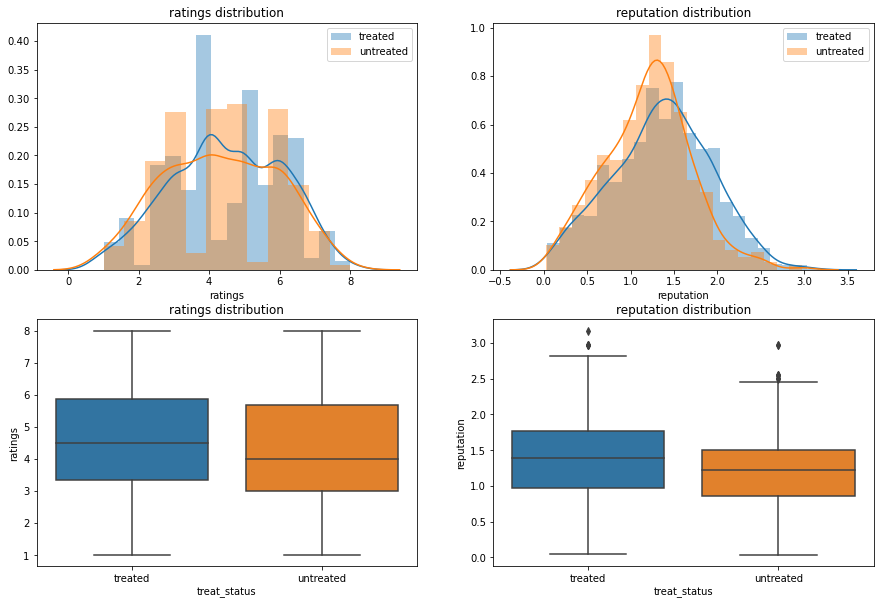

In [38]:
# Set up the plot for arxiv vs non-arxiv publications ----- CORRECT ME IF I AM WRONG
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the ratings distribution
sns.distplot(publication_treated['ratings'], ax = axes[0,0], label = 'treated')
sns.distplot(publication_non_treated['ratings'], ax = axes[0,0], label = 'untreated')
axes[0,0].set_title('ratings distribution')
axes[0,0].legend()

# Plot the reputation distribution
sns.distplot(publication_treated['reputation'], ax = axes[0,1], label = 'treated')
sns.distplot(publication_non_treated['reputation'], ax = axes[0,1], label = 'untreated')
axes[0,1].set_title('reputation distribution')
axes[0,1].legend()

# Set up for box plots
box_df = pd.concat( [publication_treated[['ratings', 'reputation', 'treat_status']].copy(),
                    publication_non_treated[['ratings', 'reputation', 'treat_status']].copy()] )

# Box plot the ratings distribution
sns.boxplot(y = 'ratings', x = 'treat_status', data = box_df, ax = axes[1,0])
axes[1,0].set_title('ratings distribution')

# Box plot the reputation distribution
sns.boxplot(y = 'reputation', x = 'treat_status', data = box_df, ax = axes[1,1])
axes[1,1].set_title('reputation distribution')

plt.show()

In [39]:
resample_size = 100
resample_group = 10000
resample_ate = []
treatment_effect = []

# Create a binary decision variable
for i in paired:
    te = 0
    if publication_treated.loc[i[0], 'decisions'] == 'Accept':
        te = 1
    if publication_non_treated.loc[i[1], 'decisions'] == 'Accept':
        te -= 1
    treatment_effect.append(te)

# Sample randomly
for i in range(resample_group):
    sampled = random.sample(treatment_effect, resample_size)
    resample_ate.append(np.mean(sampled))

resample_ate.sort()

print('IC 95%: LB={} UB={}'.format(resample_ate[int(resample_group*0.025)], resample_ate[int(resample_group*0.975)]))

IC 95%: LB=0.15 UB=0.3


__3.5.2__

There is evidence that arxiv breaks double-blind submissions, in fact ...
**Riccardo**: (before to argue this answer I would like to plot the box plots)